# 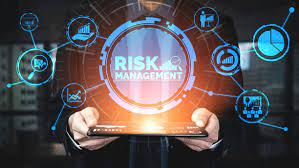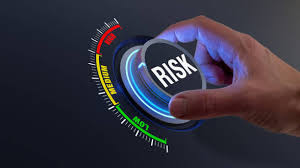

In [ ]:
# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as matrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# import  the dataset

In [ ]:
df=pd.read_csv("Default.csv")

In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [ ]:
# Check the no of observations and no of variables

In [ ]:
no_of_observations=df.shape[0]

In [ ]:
no_of_columns=df.shape[1]

In [ ]:
print(f"The no of observations in the dataset :{no_of_observations}")

The no of observations in the dataset :10000


In [ ]:
print(f"The no of columns in the dataset :{no_of_columns}")

The no of columns in the dataset :4


In [ ]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [ ]:
# Descriptive statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


In [ ]:
# Univariant analysis

<Axes: ylabel='balance'>

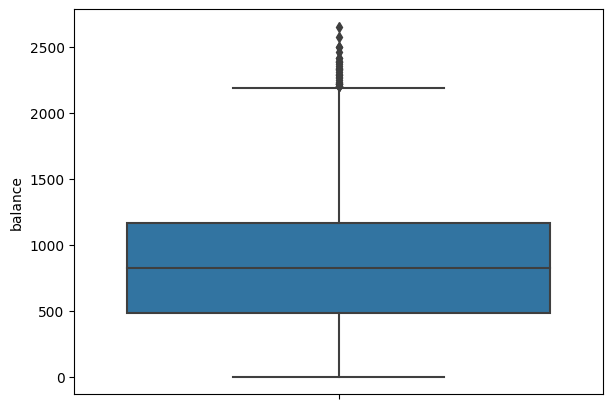

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["balance"])



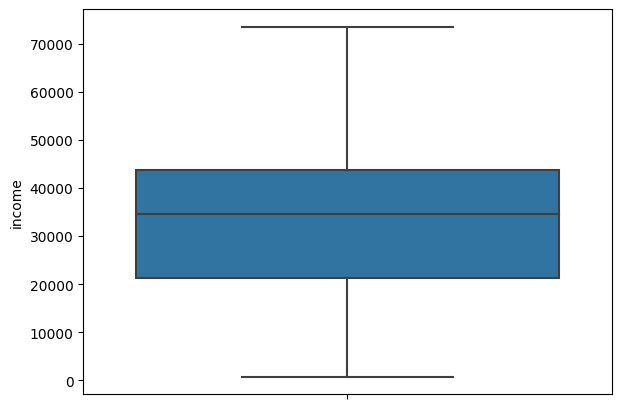

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["income"])
plt.show()

Univariant analysis for Students and Default Variable

<Axes: xlabel='count', ylabel='student'>

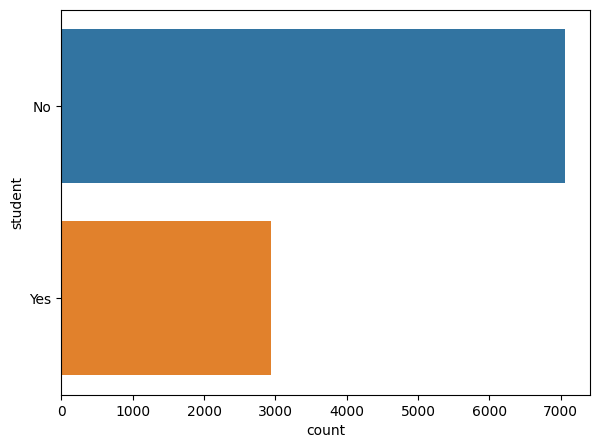

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=df["student"])


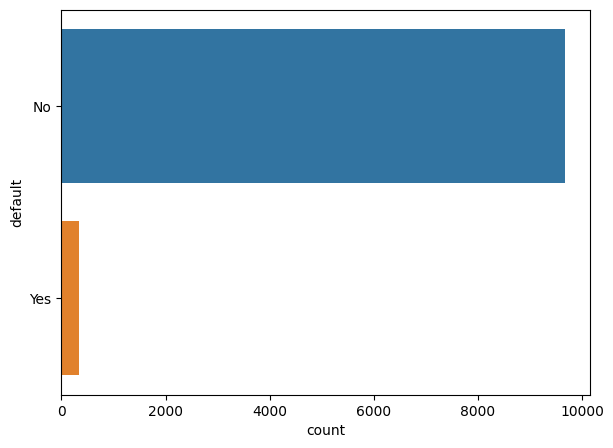

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y=df["default"])
plt.show()

In [ ]:
# Now lets us check the basis measures of descriptive stats for the categorical variables

In [ ]:
df["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [ ]:
# checking the propetion of defaults


In [ ]:
df["default"].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

In [ ]:
# Data seems to be higly inbalanced

# Bi-Variant Analysis

In [ ]:
# Default vs another variables

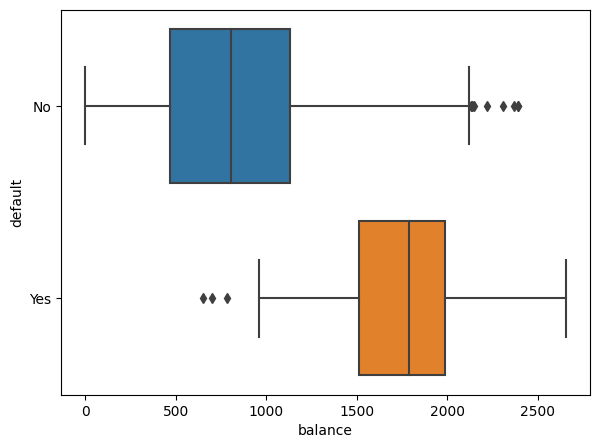

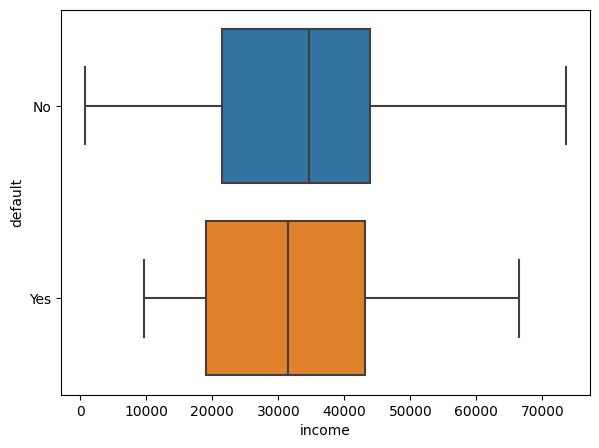

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['default'],x=df["balance"])
plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(y=df["default"],x=df["income"])
plt.show()

In [ ]:
# Inference:When the balance is higher then there is higher chances of defaulter

In [ ]:
# Defaulter income seems to be lower compared to non defaulter

In [ ]:
df.head(2)

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13


In [ ]:
df["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
pd.crosstab(df["student"],df['default'],normalize="index").round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


In [ ]:
# check for correlation analysis between independent variables

<Axes: >

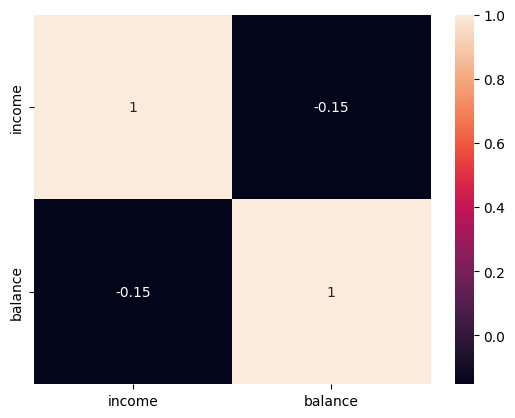

In [ ]:
sns.heatmap(df[["income","balance"]].corr(),annot=True)

In [ ]:
# check for missing value

In [ ]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
# There is no missing values in the dataset

In [ ]:
# Treating the outliers:Balance variable

In [ ]:
Q1,Q3 =df["balance"].quantile([.25,.75])
IQR =Q3-Q1
LL = Q1-1.5*IQR
UL= Q3 + 1.5*IQR


In [ ]:
print(Q1)
print()
print(Q3)
print()
print(IQR)
print(LL)
print(UL)

481.73249999999996

1166.305

684.5725000000001
-545.1262500000001
2193.16375


In [ ]:
df1=df[df["balance"]>UL]

In [ ]:
df1

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [ ]:
df2=df[df["balance"]<LL]

In [ ]:
df2

,default,student,balance,income


In [ ]:
df1["default"].count()

31

In [ ]:
df1["default"].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [ ]:
df["balance"]=np.where(df["balance"]>UL,UL,df["balance"])

<Axes: ylabel='balance'>

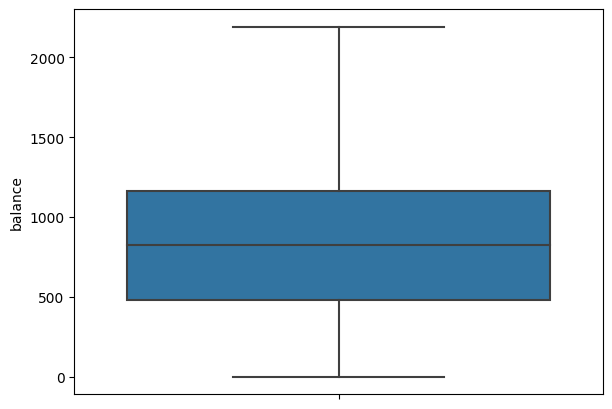

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["balance"])


In [ ]:
# Outliers have been replaced with capping/transformation method

# **start of credit risk modelling with probability of default**

In [ ]:
# Encoding categorical variables into numerical variables

In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head(10)

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
5,919.59,7491.56,0,1
6,825.51,24905.23,0,0
7,808.67,17600.45,0,1
8,1161.06,37468.53,0,0
9,0.00,29275.27,0,0


In [ ]:
# Relabeling column as per original names

In [ ]:
df.columns

Index(['balance', 'income', 'default_Yes', 'student_Yes'], dtype='object')

In [ ]:
df.columns=["balance","income","default","student"]

In [ ]:
df

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0
...,...,...,...,...
9995,711.56,52992.38,0,0
9996,757.96,19660.72,0,0
9997,845.41,58636.16,0,0
9998,1569.01,36669.11,0,0


In [ ]:
# dividing the data into dependent and independent variables

In [ ]:
x=df.drop('default',axis=1)

In [ ]:
y=df["default"]

In [ ]:
# dividing the data into train and test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)


In [ ]:
# Why stratify=y?
# -----------please note this is highly inbalance data and possibly results in different proprtions in y variables between train and test

In [ ]:
print(x_train.shape)

(8000, 3)


In [ ]:
print(x_test.shape)

(2000, 3)


In [ ]:
print(y_train.value_counts(normalize=True))

0    0.96675
1    0.03325
Name: default, dtype: float64


In [ ]:
print(y_test.value_counts(normalize=True))

0    0.9665
1    0.0335
Name: default, dtype: float64


Treating the target imbalance using smote

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=0,sampling_strategy=0.75)

In [ ]:
x_res,y_res=sm.fit_resample(x_train,y_train)

In [ ]:
y.shape

(10000,)

In [ ]:

y_res.shape

(13534,)

In [ ]:
# EXposure at Default-------Regression analysis
# Probability of Default-------classification Problem
# loss at Default

In [ ]:
y.value_counts()

0    9667
1     333
Name: default, dtype: int64

In [ ]:
y_res.value_counts()

0    7734
1    5800
Name: default, dtype: int64

In [ ]:
Default_smote =pd.concat([x_res,y_res],axis=1)

In [ ]:
# Balance Data------smote

In [ ]:
Default_smote.groupby("default").mean()

,balance,income,student
default,,,
0,806.236019,33534.979284,0.292216
1,1741.034610,32755.807972,0.326897


In [ ]:
# Original_dataset:imbalance dataset

In [ ]:
df.groupby("default").mean()

,balance,income,student
default,,,
0,803.870400,33566.166610,0.291404
1,1736.593536,32089.146847,0.381381


In [ ]:
# Model----buiding using logistic Regression algorithm for"Probabilty at Default"

In [ ]:
# The equation of the Logistic Regression by which we predict the corresponding probability and then go on predict a discreate target variable is y=1/(1+e^-z)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Now importing statsmodels modules

In [ ]:
import statsmodels.formula.api as SM

In [ ]:
# Creating Logistic Regression equation and sorting it in F_1


#### model =SM.Logit(formula='Dep_Variable~ Summation(Independent variable:k)',data=DataFrame containing the required values).fit()



In [ ]:
train=pd.concat([x_train,y_train],axis=1)
train_smote=pd.concat([x_res,y_res],axis=1)
test=pd.concat([x_test,y_test],axis=1)


In [ ]:
print(train.shape)

(8000, 4)


In [ ]:
print(train_smote.shape)

(13534, 4)


In [ ]:
print(test.shape)

(2000, 4)


In [ ]:
df.columns

Index(['balance', 'income', 'default', 'student'], dtype='object')

In [ ]:
f_1="default ~ balance+ income + student"

In [ ]:
# Fitting logistic regression model on imbalance dataset

In [ ]:
model1 =SM.logit(formula=f_1,data=train).fit()

Optimization terminated successfully.
         Current function value: 0.079890
         Iterations 10


In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7996
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Sep 2023   Pseudo R-squ.:                  0.4523
Time:                        10:54:54   Log-Likelihood:                -639.12
converged:                       True   LL-Null:                       -1166.9
Covariance Type:            nonrobust   LLR p-value:                1.574e-228
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1821      0.558    -20.039      0.000     -12.276     -10.088
balance        0.0057      0.000     22.215      0.000       0.005       0.006
income      1.146e-05   9.15e-06      1.253      0.210   -6.47e-06    2.94e-05
student       -0.4662      0.266     -1.754      0.079      -0.987       0.055
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# validating the model on train set

In [ ]:
y_pred_train=np.where(model1.predict(train)>0.5,1,0)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_train,y_pred_train)

array([[7704,   30],
       [ 182,   84]])

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7734
           1       0.74      0.32      0.44       266

    accuracy                           0.97      8000
   macro avg       0.86      0.66      0.71      8000
weighted avg       0.97      0.97      0.97      8000



In [ ]:
# validating the model on test set
y_pred_test=np.where(model1.predict(test)>0.5,1,0)

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[1921,   12],
       [  43,   24]])

In [ ]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1933
           1       0.67      0.36      0.47        67

    accuracy                           0.97      2000
   macro avg       0.82      0.68      0.73      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
print(accuracy_score(y_test,y_pred_test))

0.9725


**Model is not overfitting but the recall value is very poor basis recall we can say that there is high bias**

# **Please note accuracy is not good measurement when we have imbalance dataset or probability values**

In [ ]:
# Fitting the logistic regression model on balanced data

In [ ]:
model_2=SM.logit(formula=f_1,data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.247056
         Iterations 8


In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                13534
Model:                          Logit   Df Residuals:                    13530
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Sep 2023   Pseudo R-squ.:                  0.6382
Time:                        10:54:55   Log-Likelihood:                -3343.7
converged:                       True   LL-Null:                       -9242.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0595      0.220    -41.188      0.000      -9.491      -8.628
balance        0.0069      0.000     55.953      0.000       0.007       0.007
income     -4.826e-06   3.55e-06     -1.360      0.174   -1.18e-05    2.13e-06
student       -1.3061      0.107    -12.217      0.000      -1.516      -1.097
==============================================================================
"""

In [ ]:
y_pred_train_smote=np.where(model_2.predict(train_smote)>0.5,1,0)

In [ ]:
confusion_matrix(y_res,y_pred_train_smote)

array([[6947,  787],
       [ 655, 5145]])

In [ ]:
print(classification_report(y_res,y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7734
           1       0.87      0.89      0.88      5800

    accuracy                           0.89     13534
   macro avg       0.89      0.89      0.89     13534
weighted avg       0.89      0.89      0.89     13534



In [ ]:
print(accuracy_score(y_res,y_pred_train_smote))

0.8934535244569233


In [ ]:
# Validating on test data

In [ ]:
y_pred_test_smote=np.where(model_2.predict(test)>0.5,1,0)

In [ ]:
confusion_matrix(y_test,y_pred_test_smote)

array([[1739,  194],
       [   7,   60]])

In [ ]:
print(classification_report(y_test,y_pred_test_smote))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1933
           1       0.24      0.90      0.37        67

    accuracy                           0.90      2000
   macro avg       0.62      0.90      0.66      2000
weighted avg       0.97      0.90      0.93      2000



In [ ]:
print(accuracy_score(y_test,y_pred_test_smote))

0.8995


## we can see that we get better recall value after balancing the data hence we prefer to go with model_2

## **Conclusion: Financial Risk Analytics Using Logistic Regression for Probability of Default Calculation**

This comprehensive report delves into the application of logistic regression as a critical machine learning algorithm for estimating the probability of default in the context of financial risk analytics. Throughout our investigation, we have examined various aspects, methodologies, and outcomes to highlight the significance of logistic regression in accurately assessing and managing financial risks. Below, we provide a detailed summary of our key findings and insights:

**1. Accuracy and Predictive Capability:**
   - Logistic regression has proven to be a highly effective tool for estimating the probability of default. By modeling the likelihood of a specific event occurring (in this case, loan default), it empowers financial institutions to make informed lending decisions and manage risk with greater precision.

**2. Interpretability and Transparency:**
   - Logistic regression's interpretability is a valuable asset in the financial sector. The coefficients associated with each feature provide a transparent view of the factors influencing the probability of default, which is essential for explaining risk assessments to stakeholders, regulators, and customers.

**3. Feature Selection and Engineering:**
   - Optimal feature selection and engineering are critical for enhancing the performance of logistic regression models. Identifying relevant variables, addressing missing data, and applying data preprocessing techniques contribute to model robustness and accuracy.

**4. Model Evaluation:**
   - A thorough model evaluation, using appropriate metrics such as accuracy, precision, recall, F1-score and confusion matrices, allows for a comprehensive assessment of the logistic regression model's performance. This evaluation provides a well-rounded understanding of its strengths and weaknesses.

**5. Addressing Class Imbalance:**
   - In the realm of financial risk analytics, imbalanced datasets are common, with a significantly smaller number of defaults compared to non-defaults. Employing techniques like oversampling, undersampling, and appropriate evaluation metrics helps mitigate the challenges posed by class imbalance.

**6. Informed Decision-Making:**
   - Logistic regression models offer a systematic approach to risk assessment, enabling financial institutions to make informed decisions aligned with their risk tolerance and business objectives. This includes setting appropriate thresholds for decision-making.

**7. Regulatory Compliance:**
   - Logistic regression models can be instrumental in achieving regulatory compliance, as they assist in monitoring and reporting risk exposure, capital adequacy, and stress testing. They play a crucial role in adhering to financial regulations and industry standards.

**8. Ethical Considerations:**
   - Responsible and ethical use of logistic regression models is paramount. Proactively addressing and mitigating biases in both data and model outputs is essential to ensure fair lending practices and prevent discrimination against protected groups.

**9. Ongoing Model Monitoring and Adaptation:**
   - Financial risk is dynamic, and models must be continuously monitored and updated to adapt to changing market conditions, regulatory revisions, and evolving customer behaviors. A proactive approach to model maintenance is crucial for sustained accuracy.

**10. Future Prospects:**
   - Logistic regression, as a cornerstone of financial risk analytics, will continue to evolve in response to technological advancements and changing data landscapes. Future endeavors might explore hybrid models that combine logistic regression with other advanced machine learning techniques for even more accurate risk estimation.

In summary, logistic regression stands as a formidable tool in financial risk analytics, offering accuracy, transparency, and interpretability. When used responsibly and integrated with other risk management strategies, it empowers financial institutions to make sound lending decisions, effectively manage risk, and maintain regulatory compliance. The insights and methodologies presented in this report serve as a strong foundation for harnessing logistic regression in the context of estimating the probability of default, while recognizing the imperative for continuous improvement and adaptation in the ever-evolving financial landscape.